## 1. Setup


Clone the repository and install dependencies:

- git clone https://github.com/milanto-hery/compressed-sensing-audio.git
- cd compressed-sensing-audio
- pip install -r requirements.txt

Make sure you have Python ≥3.8 and libraries like numpy, scipy, librosa, scikit-learn, joblib, matplotlib.

## 2. Import Module & Libraries

In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import librosa

project_root = os.path.abspath("..")   # parent of src/
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Now import as package
from src.compress import encode_audio_global
from src.reconstruct import decode_and_reconstruct
from src.cs_batch import run_cs_batch
from src.utils import compute_mse, spec_db  


## 3. Load Data and Setup Path

In [4]:
# Load original
original_path = "/home/milanto/Documents/Github-Project/compressed-sensing-audio/data/bird.wav"
# compressed audio path/ it should be the same for all reconstructions
compressed_path = "/home/milanto/Documents/Github-Project/compressed-sensing-audio/data/bird_compressed_15.npz"
# the reconstructed audio paths for different algorithms
rec_fista_path = "/home/milanto/Documents/Github-Project/compressed-sensing-audio/data/fista_R0.15_rec.wav"
rec_lasso_path = "/home/milanto/Documents/Github-Project/compressed-sensing-audio/data/lasso_R0.15_rec.wav"
rec_omp_path   = "/home/milanto/Documents/Github-Project/compressed-sensing-audio/data/omp_R0.15_rec.wav"

## 4.  Single Audio File Processing

#### 4.1 Encode a WAV file:

In [5]:
compressed = encode_audio_global(
    original_path,
    compressed_path,
    R=0.15,             # 15% sampling
    seed=42,
    frame_size=2048,
    overlap=0.5
)

print("Compression complete.")


Compression complete.


#### 4.2 Encode a WAV file:

In [7]:
reconstructed_audio = decode_and_reconstruct(
    compressed_path,
    rec_fista_path,
    solver="fista"      # can change to lasso or omp
)

print("Reconstruction complete.")


Reconstruction complete.


In [8]:
reconstructed_audio = decode_and_reconstruct(
    compressed_path,
    rec_lasso_path,
    solver="lasso",
    lasso_alpha= 0.000001     
)

print("Reconstruction complete.")


Reconstruction complete.


In [9]:
reconstructed_audio = decode_and_reconstruct(
    compressed_path,
    rec_omp_path,
    solver="omp"      
)

print("Reconstruction complete.")


Reconstruction complete.


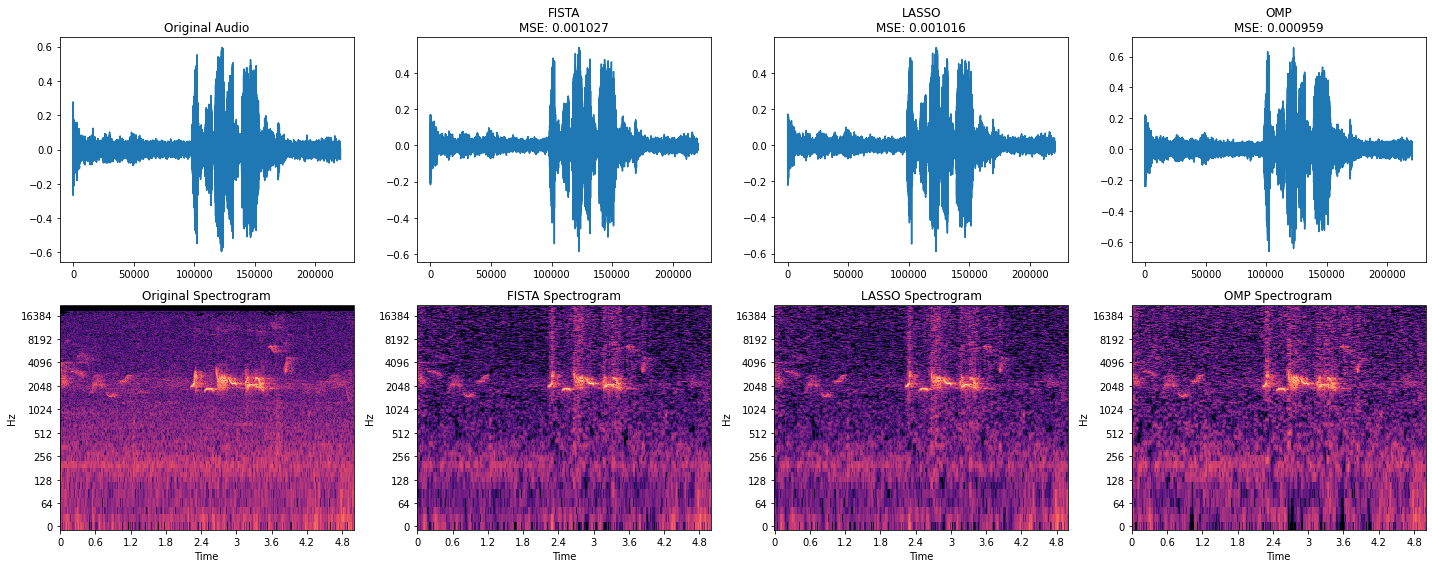

In [10]:
# Load into numpy arrays
original_audio, sr = librosa.load(original_path, sr=None, mono=True)
rec_fista, _ = librosa.load(rec_fista_path, sr=sr, mono=True)
rec_lasso, _ = librosa.load(rec_lasso_path, sr=sr, mono=True)
rec_omp, _   = librosa.load(rec_omp_path, sr=sr, mono=True)

# Compute MSEs
mse_fista = compute_mse(original_audio, rec_fista)
mse_lasso = compute_mse(original_audio, rec_lasso)
mse_omp   = compute_mse(original_audio, rec_omp)

# Compute spectrograms
spec_orig  = spec_db(original_audio)
spec_fista = spec_db(rec_fista)
spec_lasso = spec_db(rec_lasso)
spec_omp   = spec_db(rec_omp)

# Plot waveforms and spectrograms
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Top row: waveforms
axes[0,0].plot(original_audio); axes[0,0].set_title("Original Audio")
axes[0,1].plot(rec_fista); axes[0,1].set_title(f"FISTA\nMSE: {mse_fista:.6f}")
axes[0,2].plot(rec_lasso); axes[0,2].set_title(f"LASSO\nMSE: {mse_lasso:.6f}")
axes[0,3].plot(rec_omp); axes[0,3].set_title(f"OMP\nMSE: {mse_omp:.6f}")

# Bottom row: spectrograms
librosa.display.specshow(spec_orig, sr=sr, ax=axes[1,0], y_axis='log', x_axis='time')
axes[1,0].set_title("Original Spectrogram")
librosa.display.specshow(spec_fista, sr=sr, ax=axes[1,1], y_axis='log', x_axis='time')
axes[1,1].set_title("FISTA Spectrogram")
librosa.display.specshow(spec_lasso, sr=sr, ax=axes[1,2], y_axis='log', x_axis='time')
axes[1,2].set_title("LASSO Spectrogram")
librosa.display.specshow(spec_omp, sr=sr, ax=axes[1,3], y_axis='log', x_axis='time')
axes[1,3].set_title("OMP Spectrogram")

plt.tight_layout()
plt.show()


## 5. Batch processing (compress & reconstruct multiple WAV giles)
If you have many audio files in a folder, you can process them all at once using the batch runner. This will process all .wav files, compress each to ~15% for example, and reconstruct them into the output folder (wav file reconstructed).

In [ ]:
input_folder = "../data/wav_input"
output_folder = "../data/cs_output"

run_cs_batch(
    input_folder,
    output_folder,
    R=0.15,           # 15% samples per file
    solver='fista',  # or 'lasso', 'omp'
    frame_size=2048,
    overlap=0.5,
    seed=42
)
print("Batch compressed sensing reconstruction complete.")